**#1. Loading the Data**

Importing the libraries

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sqlite3


Load Dataset

In [4]:
# Connect to the database
conn = sqlite3.connect(r'.\data\titanic.db')

# Load the data into a DataFrame
df = pd.read_sql_query("SELECT * FROM titanic", conn)

# Close the connection
conn.close()

In [5]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Title,FamilySize,AgeGroup,FareCategory,Age*Pclass
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,0.014151,S,Mr,2,Young Adult,Low,66.0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,0.139136,C,Mrs,2,Adult,High,38.0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,0.015469,S,Miss,1,Young Adult,Low,78.0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,0.103644,S,Mrs,2,Adult,High,35.0
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,0.015713,S,Mr,1,Adult,Low,105.0


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 16 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   PassengerId   891 non-null    int64  
 1   Survived      891 non-null    int64  
 2   Pclass        891 non-null    int64  
 3   Name          891 non-null    object 
 4   Sex           891 non-null    object 
 5   Age           891 non-null    float64
 6   SibSp         891 non-null    int64  
 7   Parch         891 non-null    int64  
 8   Ticket        891 non-null    object 
 9   Fare          891 non-null    float64
 10  Embarked      891 non-null    object 
 11  Title         891 non-null    object 
 12  FamilySize    891 non-null    int64  
 13  AgeGroup      891 non-null    object 
 14  FareCategory  891 non-null    object 
 15  Age*Pclass    891 non-null    float64
dtypes: float64(3), int64(6), object(7)
memory usage: 111.5+ KB


**#2. Calculate key statistics**

In [7]:
survival_rate = df['Survived'].mean()
print(f"Overall Survival Rate: {survival_rate:.2f}")

Overall Survival Rate: 0.38


In [8]:
survival_rate_by_gender = df.groupby('Sex')['Survived'].mean()
print(f"Survival Rate by Gender:\n{survival_rate_by_gender}")

Survival Rate by Gender:
Sex
female    0.742038
male      0.188908
Name: Survived, dtype: float64


In [9]:
survival_rate_by_class = df.groupby('Pclass')['Survived'].mean()
print(f"Survival Rate by Class:\n{survival_rate_by_class}")

Survival Rate by Class:
Pclass
1    0.629630
2    0.472826
3    0.242363
Name: Survived, dtype: float64


In [10]:
age_distribution = df['Age'].describe()
print(f"Age Distribution:\n{age_distribution}")

Age Distribution:
count    891.000000
mean      29.779091
std       13.017438
min        0.420000
25%       22.000000
50%       30.000000
75%       35.000000
max       80.000000
Name: Age, dtype: float64


In [11]:
fare_distribution = df['Fare'].describe()
print(f"Fare Distribution:\n{fare_distribution}")

Fare Distribution:
count    891.000000
mean       0.062858
std        0.096995
min        0.000000
25%        0.015440
50%        0.028213
75%        0.060508
max        1.000000
Name: Fare, dtype: float64


**#3. Visualizations**

**Distribution of Age**

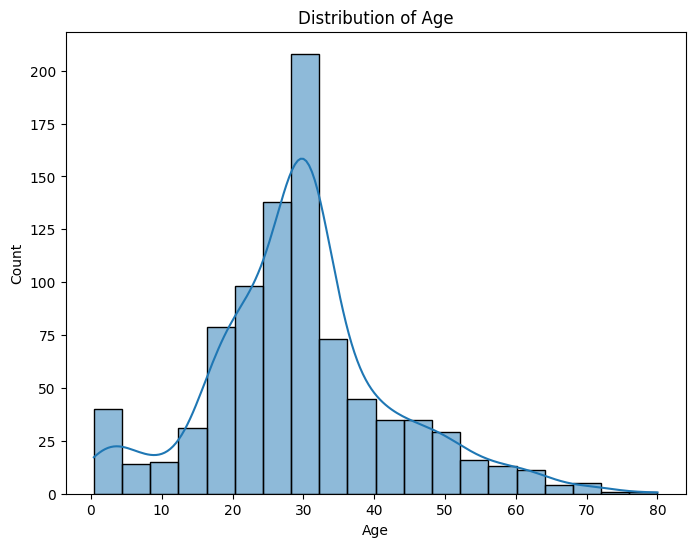

In [12]:
plt.figure(figsize=(8, 6))
sns.histplot(df['Age'].dropna(), bins=20, kde=True)
plt.title('Distribution of Age')
plt.xlabel('Age')
plt.ylabel('Count')
plt.show()

**Survival Rate by Gender**

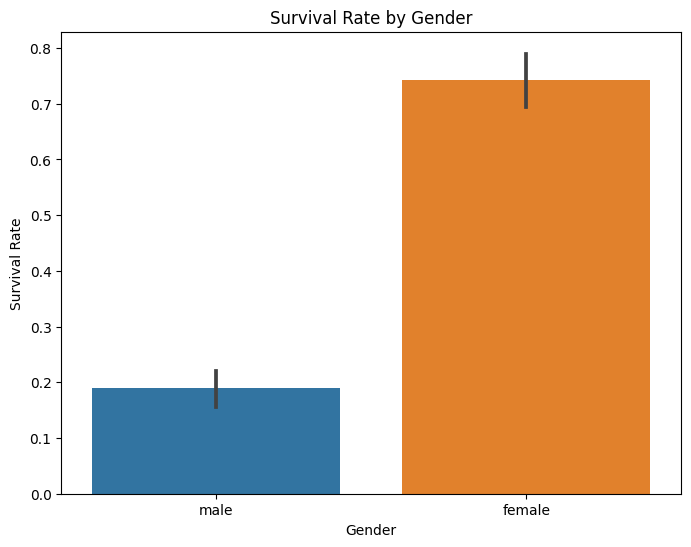

In [13]:
plt.figure(figsize=(8, 6))
sns.barplot(x='Sex', y='Survived', data=df)
plt.title('Survival Rate by Gender')
plt.xlabel('Gender')
plt.ylabel('Survival Rate')
plt.show()

**Survival Rate by Class**

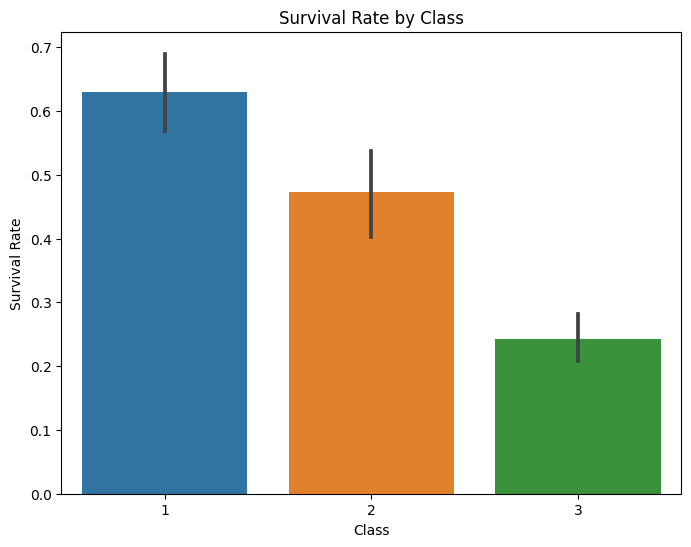

In [14]:
plt.figure(figsize=(8, 6))
sns.barplot(x='Pclass', y='Survived', data=df)
plt.title('Survival Rate by Class')
plt.xlabel('Class')
plt.ylabel('Survival Rate')
plt.show()